In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Carga de datos

file1 = pd.read_csv("world-happiness-report.csv")
file2 = pd.read_csv("world-happiness-report-2021.csv")

In [4]:
# Creación de DataFrames
df1 = pd.DataFrame(file1)
df1.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [5]:
df2 = pd.DataFrame(file2)
df2.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [6]:
df2["year"] = 2021
df2.year.head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year, dtype: int64

In [7]:
# Seleccionar y renombrar columnas para que coincidan

f_df1 = df1[["Country name","year", "Life Ladder", "Log GDP per capita", "Healthy life expectancy at birth"]]
f_df1.columns = ["Country", "Year", "Ladder", "GDP", "Life expectancy"]
f_df1.head()

,Country,Year,Ladder,GDP,Life expectancy
0,Afghanistan,2008,3.724,7.370,50.80
1,Afghanistan,2009,4.402,7.540,51.20
2,Afghanistan,2010,4.758,7.647,51.60
3,Afghanistan,2011,3.832,7.620,51.92
4,Afghanistan,2012,3.783,7.705,52.24


In [8]:
# Seleccionar y renombrar columnas para que coincidan

f_df2 = df2[["Country name",  "Regional indicator", "year", "Ladder score", "Logged GDP per capita", "Healthy life expectancy"]]
f_df2.columns = ["Country", "Continente", "Year", "Ladder", "GDP", "Life expectancy"]
f_df2.head()

,Country,Continente,Year,Ladder,GDP,Life expectancy
0,Finland,Western Europe,2021,7.842,10.775,72.0
1,Denmark,Western Europe,2021,7.620,10.933,72.7
2,Switzerland,Western Europe,2021,7.571,11.117,74.4
3,Iceland,Western Europe,2021,7.554,10.878,73.0
4,Netherlands,Western Europe,2021,7.464,10.932,72.4


In [9]:
# Concatenar DataFrames y ordenar

df_maestro = pd.concat([f_df1, f_df2]).sort_values(by=["Country", "Year"]).reset_index(drop=True)
df_maestro

,Country,Year,Ladder,GDP,Life expectancy,Continente
0,Afghanistan,2008,3.724,7.370,50.800,NaN
1,Afghanistan,2009,4.402,7.540,51.200,NaN
2,Afghanistan,2010,4.758,7.647,51.600,NaN
3,Afghanistan,2011,3.832,7.620,51.920,NaN
4,Afghanistan,2012,3.783,7.705,52.240,NaN
...,...,...,...,...,...,...
2093,Zimbabwe,2017,3.638,8.016,55.000,NaN
2094,Zimbabwe,2018,3.616,8.049,55.600,NaN
2095,Zimbabwe,2019,2.694,7.950,56.200,NaN
2096,Zimbabwe,2020,3.160,7.829,56.800,NaN


In [26]:
# Información del DataFrame concatenado

df_maestro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          2098 non-null   object 
 1   Year             2098 non-null   int64  
 2   Ladder           2098 non-null   float64
 3   GDP              2062 non-null   float64
 4   Life expectancy  2043 non-null   float64
 5   Continente       149 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 98.5+ KB


In [11]:
# Verificar si hay valores nulos en GDP

df_maestro[df_maestro.GDP.isnull()]

,Country,Year,Ladder,GDP,Life expectancy,Continente
454,Cuba,2006,5.418,NaN,68.44,NaN
467,Cyprus,2020,6.260,NaN,74.10,NaN
761,Hong Kong S.A.R. of China,2020,5.295,NaN,NaN,NaN
828,Iran,2018,4.278,NaN,66.00,NaN
829,Iran,2019,5.006,NaN,66.30,NaN
830,Iran,2020,4.865,NaN,66.60,NaN
986,Kosovo,2020,6.294,NaN,NaN,NaN
1171,Malta,2020,6.157,NaN,72.20,NaN
1381,North Cyprus,2012,5.463,NaN,NaN,NaN
1382,North Cyprus,2013,5.567,NaN,NaN,NaN


## Pregunta 1: País más feliz de 2021

In [32]:
happy_2021 = df_maestro[df_maestro['Year'] == 2021]
most_happy_country_2021 = happy_2021.loc[happy_2021['Ladder'].idxmax()]
happy_2021_sorted = happy_2021.sort_values('Ladder', ascending=False)
happy_2021_sorted.head(10)

,Country,Year,Ladder,GDP,Life expectancy,Continente
604,Finland,2021,7.842,10.775,72.0,Western Europe
497,Denmark,2021,7.620,10.933,72.7,Western Europe
1790,Switzerland,2021,7.571,11.117,74.4,Western Europe
786,Iceland,2021,7.554,10.878,73.0,Western Europe
1321,Netherlands,2021,7.464,10.932,72.4,Western Europe
1413,Norway,2021,7.392,11.053,73.3,Western Europe
1779,Sweden,2021,7.363,10.867,72.7,Western Europe
1105,Luxembourg,2021,7.324,11.647,72.6,Western Europe
1336,New Zealand,2021,7.277,10.643,73.4,North America and ANZ
99,Austria,2021,7.268,10.906,73.3,Western Europe


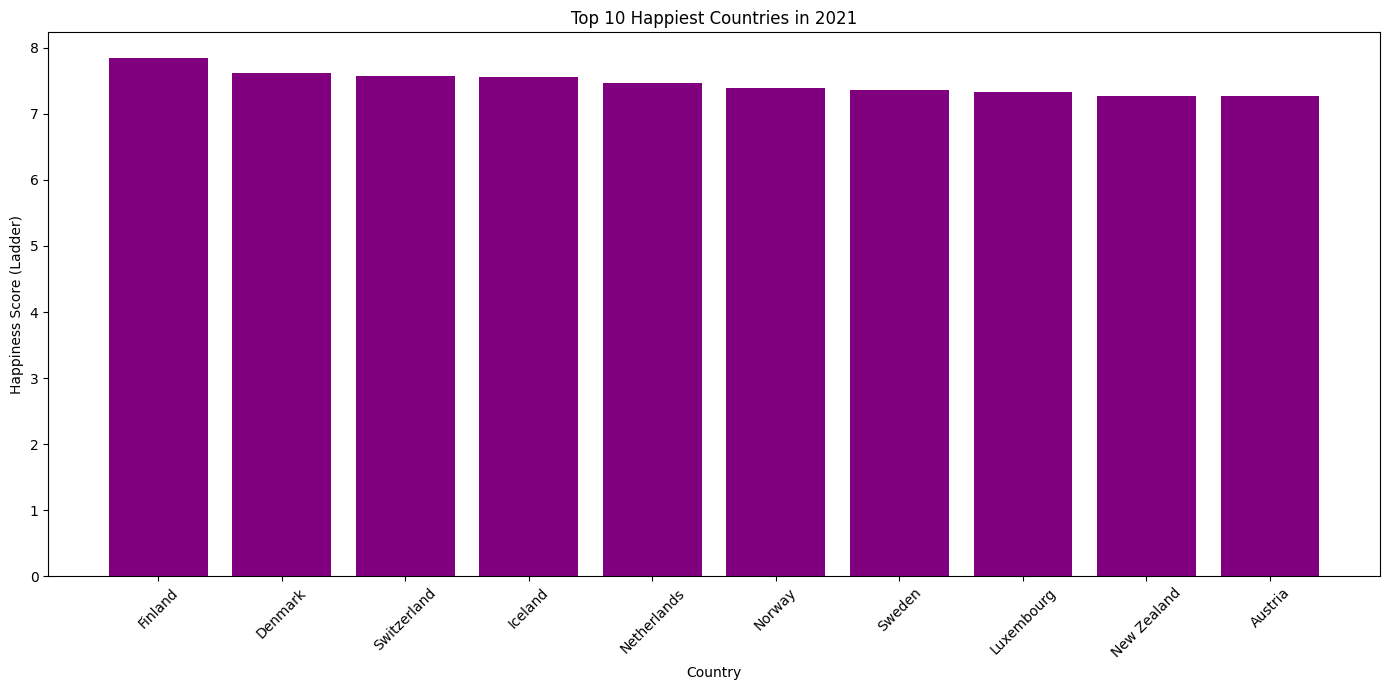

In [14]:
happy_2021_sorted = happy_2021.sort_values('Ladder', ascending=False).head(10)

# Ahora, cree la gráfica de barras
plt.figure(figsize=(14, 7))
plt.bar(happy_2021_sorted['Country'], happy_2021_sorted['Ladder'], color='purple')

# Añadi las etiquetas y título
plt.xlabel('Country')
plt.ylabel('Happiness Score (Ladder)')
plt.title('Top 10 Happiest Countries in 2021')

# Rote las etiquetas del eje x para mejor lectura
plt.xticks(rotation=45)

# Ajuste y mostre la gráfica
plt.tight_layout()
plt.show()

## Pregunta 2: ¿Cuál es el país más “feliz” del 2021 por continente según la data?

In [15]:
# Filtre el DataFrame para el año 2021
df_2021 = df_maestro[df_maestro['Year'] == 2021]

# Agrupe por 'Continente' y encontramos el país más feliz de cada continente
happiest_by_continent = df_2021.groupby('Continente').apply(lambda x: x.loc[x['Ladder'].idxmax()])

# Cree un nuevo DataFrame con los resultados
happiest_countries_by_continent_df = happiest_by_continent.reset_index(drop=True)

# Seleccione solo las columnas relevantes para mostrar
happiest_countries_by_continent_df = happiest_countries_by_continent_df[['Continente', 'Country', 'Ladder']]

# Mostre el DataFrame
happiest_countries_by_continent_df


,Continente,Country,Ladder
0,Central and Eastern Europe,Czech Republic,6.965
1,Commonwealth of Independent States,Uzbekistan,6.179
2,East Asia,Taiwan Province of China,6.584
3,Latin America and Caribbean,Costa Rica,7.069
4,Middle East and North Africa,Israel,7.157
5,North America and ANZ,New Zealand,7.277
6,South Asia,Nepal,5.269
7,Southeast Asia,Singapore,6.377
8,Sub-Saharan Africa,Mauritius,6.049
9,Western Europe,Finland,7.842


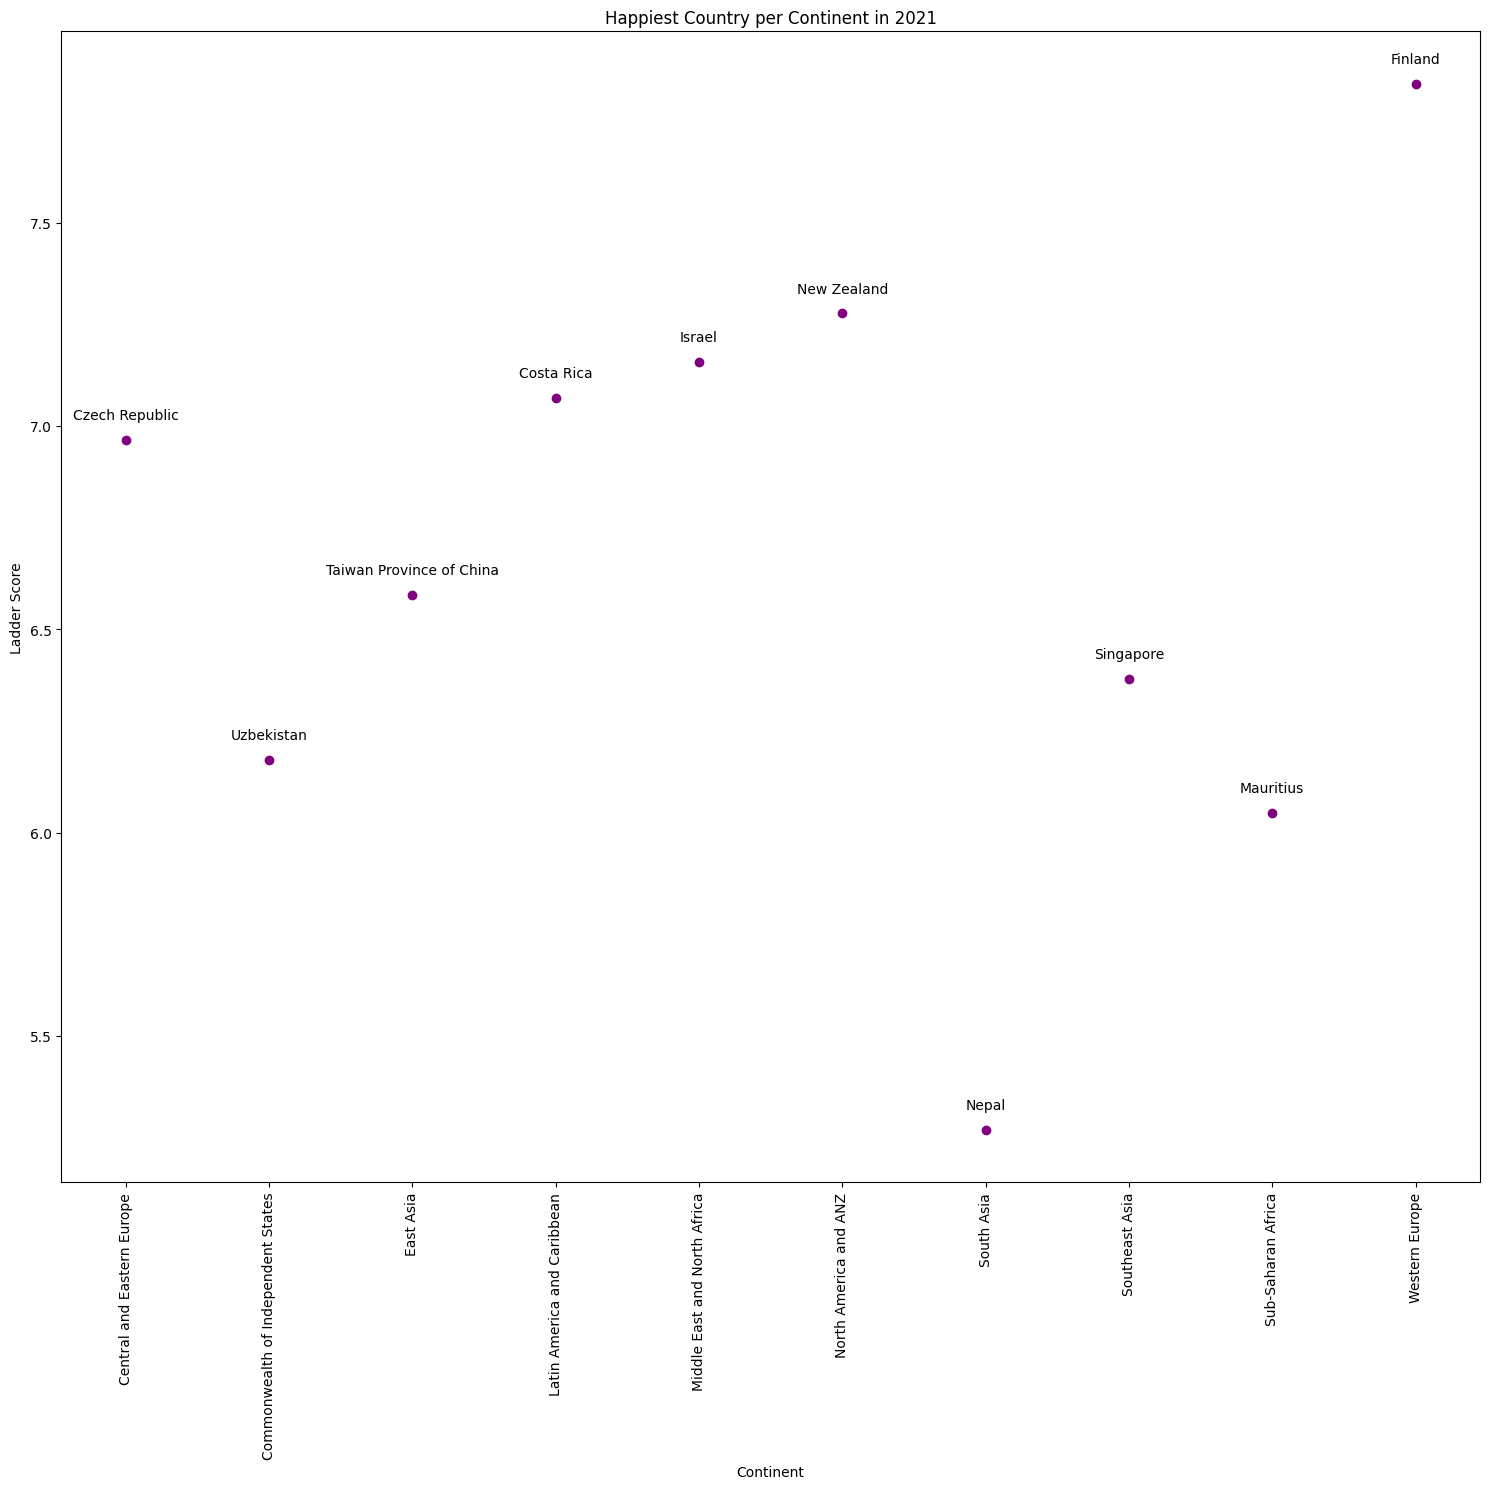

In [16]:
# Extraje los valores de Ladder score y asigne un número a cada continente para el eje x
continent_numbers = {continent: i for i, continent in enumerate(happiest_countries_by_continent_df['Continente'].unique())}
x = happiest_countries_by_continent_df['Continente'].map(continent_numbers)
y = happiest_countries_by_continent_df['Ladder']

# Cree el scatterplot
plt.figure(figsize=(15, 15))
plt.scatter(x, y, color='purple')

# Añadi etiquetas para mayor claridad
plt.title('Happiest Country per Continent in 2021')
plt.xlabel('Continent')
plt.ylabel('Ladder Score')
plt.xticks(ticks=list(continent_numbers.values()), labels=list(continent_numbers.keys()), rotation=90)

# Añadi etiquetas de texto para cada punto
for i, txt in enumerate(happiest_countries_by_continent_df['Country']):
    plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0,15), ha='center')

plt.tight_layout()
plt.show()

## Pregunta 3: Cuál es el país que más veces ocupó el primer lugar en todos los años

In [28]:
# Cree un diccionario para contar las veces que un país ha ocupado el primer lugar en el índice de felicidad
first_place_counts = {}

# Itere sobre cada año disponible en el DataFrame
for year in df_maestro['Year'].unique():
    # Busque el país con el mayor puntaje de felicidad para ese año
    top_country = df_maestro[df_maestro['Year'] == year].nlargest(1, 'Ladder')
    country_name = top_country['Country'].values[0]
    
    # Si el país ya está en el diccionario, incremente su valor en 1
    if country_name in first_place_counts:
        first_place_counts[country_name] += 1
    else:
        first_place_counts[country_name] = 1

# Identifique el país que ha ocupado el primer lugar más veces
country_most_first_places = max(first_place_counts, key=first_place_counts.get)
times_first = first_place_counts[country_most_first_places]

country_most_first_places, times_first


('Denmark', 7)

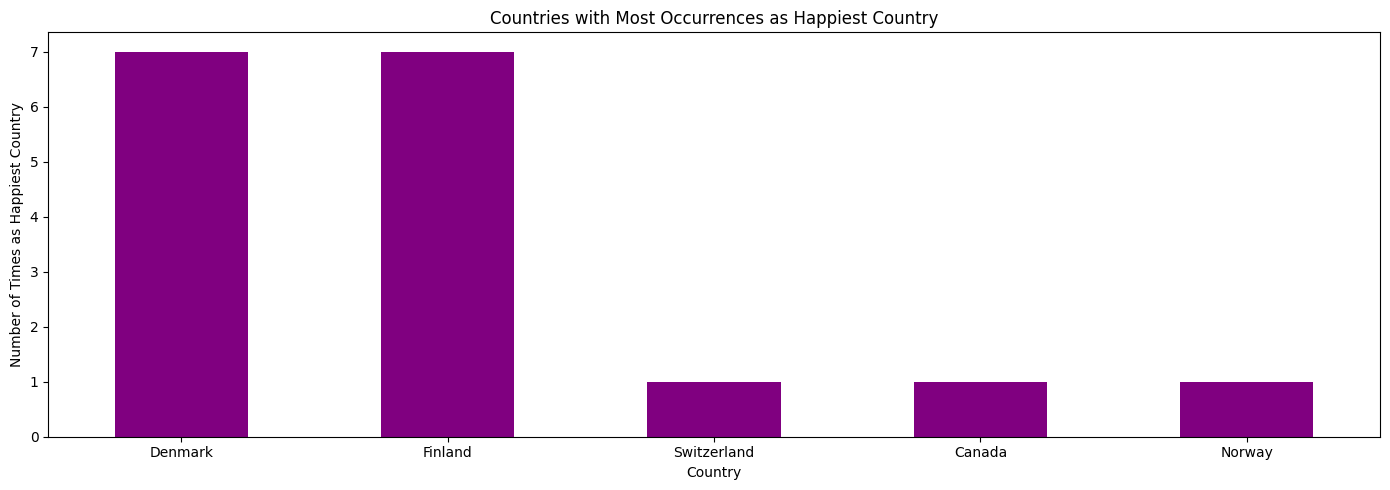

In [18]:
# Calcule el país con el mayor puntaje Ladder cada año
top_country_by_year = df_maestro.loc[df_maestro.groupby('Year')['Ladder'].idxmax()]

# Conte las veces que cada país ha sido el más feliz
top_country_counts = top_country_by_year['Country'].value_counts().head(5)

# Gráfica de los 10 países que más veces han sido el más feliz
plt.figure(figsize=(14, 5))
top_country_counts.plot(kind='bar', color='purple')
plt.xlabel('Country')
plt.ylabel('Number of Times as Happiest Country')
plt.title('Countries with Most Occurrences as Happiest Country')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Pregunta 4: Puesto de Felicidad del país con mayor GDP en 2020

In [35]:
# Ordene el DataFrame por la columna 'GDP' en orden descendente para el año 2020
gdp_2020_sorted = df_maestro[df_maestro['Year'] == 2020].sort_values('GDP', ascending=False)
display(gdp_2020_sorted[['Country', 'GDP']])
country_with_highest_gdp_2020 = gdp_2020_sorted.iloc[0]
display(country_with_highest_gdp_2020[['Country', 'GDP']])
happiness_rank_2021 = df_maestro[(df_maestro['Country'] == country_with_highest_gdp_2020['Country']) & (df_maestro['Year'] == 2020)]
display(happiness_rank_2021[['Country', 'Year', 'Ladder']])


,Country,GDP
858,Ireland,11.323
1789,Switzerland,11.081
1959,United Arab Emirates,11.053
1412,Norway,11.042
1991,United States,11.001
...,...,...
830,Iran,NaN
986,Kosovo,NaN
1171,Malta,NaN
1810,Taiwan Province of China,NaN


Country    Ireland
GDP         11.323
Name: 858, dtype: object

,Country,Year,Ladder
858,Ireland,2020,7.035


## Pregunta 5: Variación porcentual del GDP promedio mundial de 2020 a 2021 y si aumentó o disminuyó

In [42]:
average_gdp_2020 = df_maestro[df_maestro['Year'] == 2020]['GDP'].mean()
average_gdp_2021 = df_maestro[df_maestro['Year'] == 2021]['GDP'].mean()
gdp_change = ((average_gdp_2021 - average_gdp_2020) / average_gdp_2020) * 100
average_gdp_2020, average_gdp_2021, gdp_change


(9.751329545454544, 9.432208053691275, -3.2725946782510653)

In [21]:
# Cree una tabla pivote para el PIB en 2020 y 2021
gdp_pivot = df_maestro[df_maestro['Year'].isin([2020, 2021])].pivot(index='Country', columns='Year', values='GDP')
gdp_pivot['Cambio Porcentual'] = ((gdp_pivot[2021] - gdp_pivot[2020]) / gdp_pivot[2020]) * 100
gdp_pivot_sorted = gdp_pivot.sort_values('Cambio Porcentual', ascending=False)
gdp_pivot_sorted


Year,2020,2021,Cambio Porcentual
Country,,,
Zimbabwe,7.829,7.943,1.456125
Argentina,9.850,9.962,1.137056
Iraq,9.167,9.240,0.796335
Spain,10.488,10.571,0.791381
Mexico,9.782,9.859,0.787160
...,...,...,...
Turkmenistan,NaN,9.629,NaN
Uzbekistan,NaN,8.836,NaN
Venezuela,NaN,9.073,NaN


## Pregunta 6: País con mayor expectativa de vida en 2021

In [29]:
country_with_highest_life_expectancy_2021 = df_maestro[df_maestro['Year'] == 2021].sort_values(by='Life expectancy', ascending=False).iloc[0]
country_with_highest_life_expectancy_2021

Country                 Singapore
Year                         2021
Ladder                      6.377
GDP                        11.488
Life expectancy            76.953
Continente         Southeast Asia
Name: 1653, dtype: object

In [31]:
country_with_highest_life_expectancy_2021 = df_maestro[df_maestro['Year'] == 2021].sort_values(by='Life expectancy', ascending=False).iloc[0]
life_expectancy_df = pd.DataFrame([country_with_highest_life_expectancy_2021])
life_expectancy_df[['Country', 'Year', 'Life expectancy']]

,Country,Year,Life expectancy
1653,Singapore,2021,76.953


## Pregunta 7: Expectativa de vida del país con mayor expectativa en 2019

In [51]:
country_with_highest_life_expectancy_2021 = df_maestro[df_maestro['Year'] == 2021].sort_values(by='Life expectancy', ascending=False).iloc[0]['Country']
life_expectancy_2019 = df_maestro[(df_maestro['Country'] == country_with_highest_life_expectancy_2021) & (df_maestro['Year'] == 2019)]
display(life_expectancy_2019[['Country', 'Year', 'Life expectancy']])

,Country,Year,Life expectancy
1652,Singapore,2019,77.1
